# ___LeNet CNN Architecture___

## ___Introduction___

_LeNet-5, from the paper Gradient-Based Learning Applied to Document Recognition, is a very efficient convolutional neural network for handwritten character recognition._


<a href="http://yann.lecun.com/exdb/publis/pdf/lecun-98.pdf" target="_blank"><i>Paper: </i><u><i>Gradient-Based Learning Applied to Document Recognition</i></u></a>

_**Authors**: Yann LeCun, Léon Bottou, Yoshua Bengio, and Patrick Haffner_

_**Published in**: Proceedings of the IEEE (1998)_

## ___Structure of the LeNet Network___

_LeNet5 is a small network, it contains the basic modules of deep learning: convolutional layer, pooling layer, and full link layer. It is the basis of other deep learning models. Here we analyze LeNet5 in depth. At the same time, through example analysis, deepen the understanding of the convolutional layer and pooling layer._

<img src='https://drek4537l1klr.cloudfront.net/elgendy/v-3/Figures/05_01.png'/>


_LeNet-5 Total seven layer , does not comprise an input, each containing a trainable parameters; each layer has a plurality of the Map the Feature , a characteristic of each of the input FeatureMap extracted by means of a convolution filter, and then each FeatureMap There are multiple neurons._

<img src='https://i.pinimg.com/564x/0b/f9/bf/0bf9bfa5bad6c9760b862e33cc00a031.jpg'/>

### ___INPUT Layer___

_The first is the data INPUT layer. The size of the input image is uniformly normalized to 32 * 32._

_If we take a standard MNIST image for our understanding then we have an input of (32x32) grayscale image which passes through the first convolution layer. The values of the input pixels are normalized so that the white background and foreground black corresponds to -0.1 and 1.175 respectively, making mean approximately as 0 and the variance approximately as 1._

_This layer does not count as the network structure of LeNet-5. Traditionally, the input layer is not considered as one of the network hierarchy._


### ___C1 Layer - Convolutional Layer___

<img src='https://miro.medium.com/max/700/1*8FF7uNQE-fG02l9HELRnYw.png'/>

>___Input picture___: 32 * 32

>___Convolution kernel size___: 5 * 5

>___Convolution kernel types___: 6

>___Output featuremap size___: 28 * 28 ___[(32-5 + 1) = 28] [((Input Size - Filter Size)/Stride)+1]___

>___Number of neurons___: 28 * 28 * 6 = 4704

>___Trainable parameters___: (5 * 5 + 1) * 6 = 156 ___[(Weights + Bias)per filter * No. of filters]___

>___Number of connections___: (5 * 5 + 1) * 6 * 28 * 28 = 122304

___Detailed Description:___

* _The first convolution operation is applied on the input image (using 6 convolution kernels of size 5 x 5) to obtain 6 C1 feature maps (6 feature maps each of size 28 x 28), where size is obtained by (N-f+2P)/S+1, but as here P=0 and S=1, hence we are using N-f+1 throughout the content. Therefore, the output size after the convolution is 32–5 + 1 = 28._


* _Let’s take a look at the numbers of parameters that are needed. The size of the convolution kernel is 5 x 5, and there are 6 * (5 * 5 + 1) = 156 parameters in total, where +1 indicates that the kernel has a bias._


* _For the convolutional layer C1, each pixel in C1 is connected to 5 * 5 pixels and 1 bias, so there are 156 * 28 * 28 = 122304 connections in total. Though there are 1,22,304 connections, we only need 156 parameters to be learned, mainly through weight sharing._

### ___S2 Layer - Pooling Layer (Downsampling Layer)___

<img src='https://miro.medium.com/max/700/1*h7YUD0zqvkoAlBQ9iyYCGg.png'/>

> ___Input___ : 28 * 28

> ___Sampling Area___: 2 * 2

> ___Sampling method___ : _The 4 inputs are added to a unit in S2 from the corresponding feature map in C1 , then multiplied by a trainable coefficient, and added a trainable bias to it. The result is then passed through a sigmoidal activation function and we get the result Q._

<img src='https://miro.medium.com/max/700/1*gE8TnA4ZTC5rMx4SzHZQ0Q.png'/>
 
> ___No. of filters___: 6

> ___Strides___: 2

> ___Padding___: 0

> ___Output featureMap size___ : 14 * 14 (28/2)

> ___Number of Neurons___ : 14 * 14 * 6 = 1,176

> ___Trainable Parameters___ : (1 + 1) * 6 ___[(Coefficient + Bias ) * No. of filters]___

_where, the first 1 is the weight of the 2 x 2 receptive field corresponding to the pooling, and the second 1 is the bias._

> ___Number of connections___ : (2 * 2 + 1) * 6 * 14 * 14 = 5880

___The size of each feature map in S2 is 1/4 of the size of the feature map in C1.___

___Detailed Description:___

* _The pooling operation is followed immediately after the first convolution. Pooling is performed using 2 * 2 kernels, and S2, 6 feature maps of 14 * 14 (28/2 = 14) are obtained._ 


* _The pooling layer of S2 is the sum of the pixels in the 2 * 2 area in C1 multiplied by a weight coefficient plus an offset, and then the result is mapped again._ 


* _So each pooling core has two training parameters, so there are 2x6 = 12 training parameters, but there are 5x14x14x6 = 5880 connections._

### ___C3 Layer - Convolutional Layer___

<img src='https://miro.medium.com/max/700/1*qG1zQAwWORt9FhsOP2fr_g.png'/>

> ___Input___: All 6 or several feature map combinations in S2

> ___Convolution Kernel Size___: 5 * 5

> ___Convolution Kernel Types___: 16

> ___Output featureMap Size___ : 10 * 10 ___[(14-5 + 1) = 10]___

_As here we can see that input i.e. S2 has 6 layers and the output i.e. C3 has 16 layers. Therefore we can not directly map each input layer to the output layer. So due to this, each unit in each feature map i.e. C3 is connected to several (5 x 5) neighborhoods at identical locations in a subset of S2’s feature maps._

___The combination of different input feature maps selection from S2 will allow more new features to be extracted.___

_The different combinations of feature maps taken from S2 are shown in the figure below:_
* ___Taking inputs from every contiguous subset of 3 feature maps from S2:___ _First 6 convolution layers of C3 are made with this combination._
* ___Taking inputs from every contiguous subset of 4 feature maps from S2:___ _Next 6 convolution layers of C3 are made with this combination._
* ___Taking inputs from the discontinuous subset of 4 feature maps from S2:___ _Next 3 layers of C3 were made with this combination._
* ___Taking all the feature maps:___ _The last layer of C3 is made with this combination._

<img src='https://miro.medium.com/max/700/1*aJ1cLUx_Sb6W5neBCCrmSA.png'/>

> ___Trainable Parameters___: 6 * (3 * 5 * 5 + 1) + 6 * (4 * 5 * 5 + 1) + 3 * (4 * 5 * 5 + 1) + 1 * (6 * 5 * 5 +1) = 1516

_NOTE:- In the above calculation the numbers 3, 4, 4, 6 used with 5*5 in the parenthesis are basically the depth._

> ___Number of Connections___: 10 * 10 * 1516 = 151600

### ___S4 Layer - Pooling Layer (Downsampling Layer)___

<img src='https://miro.medium.com/max/700/1*jsYhWqPfBAoo4UrvyojuQg.png'/>

> ___Input___ : 10 * 10

> ___Sampling Area___: 2 * 2

> ___Sampling method___ : _The 4 inputs are added to a unit in S2 from the corresponding feature map in C1 , then multiplied by a trainable coefficient, and added a trainable bias to it. The result is then passed through a sigmoidal activation function and we get the result Q._
 
> ___No. of filters___: 16

> ___Strides___: 2

> ___Padding___: 0

> ___Output featureMap size___ : 5 * 5 (10/2)

> ___Number of Neurons___ : 5 * 5 * 16 = 400

> ___Trainable Parameters___ : (1 + 1) * 16 = 32 ___[(Coefficient + Bias ) * No. of filters]___

_where, the first 1 is the weight of the 2 x 2 receptive field corresponding to the pooling, and the second 1 is the bias._

> ___Number of connections___ : (2 * 2 + 1) * 16 * 5 * 5 = 2000

___Detailed Description:___

* _S4 is the pooling layer, the window size is still 2 * 2, a total of 16 feature maps, and the 16 10x10 maps of the C3 layer are pooled in units of 2x2 to obtain 16 5x5 feature maps. This layer has a total of 32 training parameters of 2x16, 5x5x5x16 = 2000 connections._


* ___The connection is similar to the S2 layer.___

### ___C5 Layer - Convolutional Layer___

<img src='https://miro.medium.com/max/700/1*oP78g9ch6zEXcgE8FS5KDw.png'/>

_In the fifth layer, we have a fully connected Convolution layer C5 that has 120 neuron units, and each unit of C5 is connected to (5 x 5) neighborhood on all 16 of S4’s feature maps i.e. every unit of C5 is connected to all the feature maps of S4 and, thus C5 is known as Fully Connected Convolution Layer._

_C5 is named as “Fully connected Convolution Layer” instead of simply “Fully connected layer” because if input size to the LeNet-5 is increased keeping everything else constant, the dimension of feature maps in C5 layer would be greater than (1 x 1)._

_So in the fourth layer, the resulting dimensions are (5x5x16), so the total nodes are 5x5x16 = 400 neurons. That means, 400 nodes are connected to 120 nodes as a dense fully connected network._

> ___Input___: All 16 unit feature maps of the S4 layer (all connected to s4)
 
> ___Convolution Kernel Size___: 5 * 5
 
> ___Convolution Kernel Type___: 120
 
> ___Output featureMap Size___: 1 * 1 [(5-5 + 1)]

> ___Trainable Parameters___: (16 * 5 * 5 + 1)* 120 = 48120

> ___Trainable Connection___: (16 * 5 * 5 + 1)* 120 * (1 * 1) = 48120

### ___F6 Layer - Fully Connected Layer___

_The Sixth layer F6 consists of 84 neurons Fully connected with C5. Here dot product between the input vector and weight vector is performed and then bias is added to it. The result is then passed through a sigmoidal activation function._

> ___Input___: C5 with 120 neurons

> ___Output___: F6 with 84 neurons

> ___No. of learning parameters___ : 84 * (120 + 1) = 10,164

_The number of neurons in the __F6 layer is chosen as 84, corresponding to a 7 x 12 bitmap, -1 means white, 1 means black, so the black and white of the bitmap of each symbol corresponds to a code__. Such a representation is useful for recognizing strings of characters taken from the printable ASCII set. The characters that look similar and confusing as Uppercase O, 0, and lowercase O will have the same output codes._

_The ASCII encoding set is as follows:_

<img src='https://miro.medium.com/max/700/1*vD8SQ2q_JKwb-ScR0YBoxg.png'/>

### ___Output Layer - Fully Connected Layer___

_Finally, we have a fully connected softmax output layer with 10 possible values corresponding to the digits from 0 to 9._

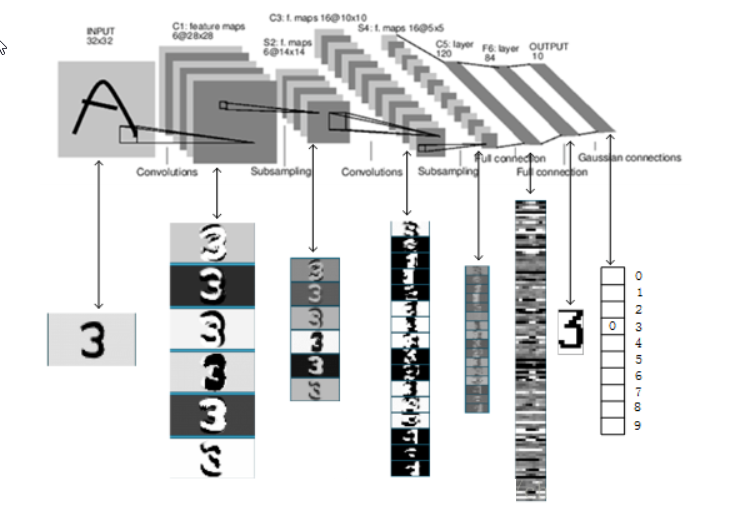

### ___Summary___

<img src='https://raw.githubusercontent.com/valoxe/image-storage-1/master/research-paper-summary/lenet-5/2.png?token=AMAXSKIFVOFJARUUJULNGWS6WMEQG'/>

* _LeNet-5 has:_

    * _2 Convolutional layers._
    * _3 Fully connected layers._
    * _2 Average pooling layers._
    * _Tanh as activation function for hidden layer._
    * _Softmax as activation function for output layer._
    * _Cross-entropy as cost function_
    * _Gradient descent as optimizer._


* _LeNet-5 is a very efficient convolutional neural network for handwritten character recognition._


* _Convolutional neural networks can make good use of the structural information of images._


* _The convolutional layer has fewer parameters, which is also determined by the main characteristics of the convolutional layer, that is, local connection and shared weights._

## ___Code Block of LeNET - 5 Model___

```
def LeNet_5():
    model = Sequential()

    # C1: (None,32,32,1) -> (None,28,28,6).
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', 
                     input_shape=(32,32,1), padding='valid'))

    # P1: (None,28,28,6) -> (None,14,14,6).
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # C2: (None,14,14,6) -> (None,10,10,16).
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), 
                     activation='tanh', padding='valid'))

    # P2: (None,10,10,16) -> (None,5,5,16).
    model.add(AveragePooling2D(pool_size=(2, 2), 
                               strides=(2, 2), padding='valid'))

    # Flatten: (None,5,5,16) -> (None, 400).
    model.add(Flatten())

    # FC1: (None, 400) -> (None,120).
    model.add(Dense(120, activation='tanh'))

    # FC2: (None,120) -> (None,84).
    model.add(Dense(84, activation='tanh'))

    # FC3: (None,84) -> (None,10).
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 
    
    return model
```

## ___Implementation of LeNet-5 using Keras___

In [11]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense
from keras.models import Sequential
from keras.optimizers import Adam 
from keras.losses import CategoricalCrossentropy 
from keras.utils import to_categorical

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset and perform splitting
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [7]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(28, 28), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

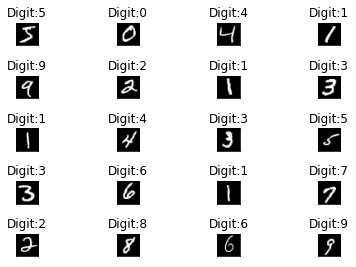

In [8]:
plot_digits(X_train, y_train)

In [9]:
print("The size of train_x is: {}".format(X_train.shape))
print("The size of train_y is: {}".format(y_train.shape))

print("The size of test_x is: {}".format(X_test.shape))
print("The size of test_y is: {}".format(y_test.shape))

The size of train_x is: (60000, 28, 28)
The size of train_y is: (60000,)
The size of test_x is: (10000, 28, 28)
The size of test_y is: (10000,)


In [13]:
# Peforming reshaping operation
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Pad images with 0s to get the shape of 32x32 as in original model
X_train = np.pad(X_train, ((0,0),(2,2),(2,2),(0,0)), 'constant')
X_test = np.pad(X_test, ((0,0),(2,2),(2,2),(0,0)), 'constant')

print("Updated Image Shape for: ", end='\n\n')
print("-Training set: {}".format(X_train.shape))
print("-Test set: {}".format(X_test.shape))

Updated Image Shape for: 

-Training set: (60000, 32, 32, 1)
-Test set: (10000, 32, 32, 1)


In [14]:
# Normalization
X_train = X_train / 255
X_test = X_test / 255

In [15]:
# Defining LeNet Model

def LeNet_5():
    model = Sequential()

    # C1: (None,32,32,1) -> (None,28,28,6).
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32,32,1), padding='valid'))

    # P1: (None,28,28,6) -> (None,14,14,6).
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # C2: (None,14,14,6) -> (None,10,10,16).
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))

    # P2: (None,10,10,16) -> (None,5,5,16).
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # Flatten: (None,5,5,16) -> (None, 400).
    model.add(Flatten())

    # FC1: (None, 400) -> (None,120).
    model.add(Dense(120, activation='tanh'))

    # FC2: (None,120) -> (None,84).
    model.add(Dense(84, activation='tanh'))

    # FC3: (None,84) -> (None,10).
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy']) 
    
    return model

In [17]:
model = LeNet_5()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

# Save the model.
model.save("/content/lenet5_model.h5")

Epoch 1/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.5839 - accuracy: 0.8478 - val_loss: 0.2846 - val_accuracy: 0.9179
Epoch 2/20
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2485 - accuracy: 0.9278 - val_loss: 0.1997 - val_accuracy: 0.9431
Epoch 3/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.1785 - accuracy: 0.9482 - val_loss: 0.1463 - val_accuracy: 0.9583
Epoch 4/20
1875/1875 [==============================] - 42s 23ms/step - loss: 0.1371 - accuracy: 0.9597 - val_loss: 0.1148 - val_accuracy: 0.9652
Epoch 5/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.1113 - accuracy: 0.9678 - val_loss: 0.0976 - val_accuracy: 0.9719
Epoch 6/20
1875/1875 [==============================] - 40s 21ms/step - loss: 0.0946 - accuracy: 0.9723 - val_loss: 0.0841 - val_accuracy: 0.9756
Epoch 7/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0825 - accuracy: 0.9758 - val_loss: 0.0748 -

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d (AveragePo (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_1 (Average (None, 5, 5, 16)          0         
_________________________________________________________________
flatten (Flatten)            (None, 400)               0         
_________________________________________________________________
dense (Dense)                (None, 120)               48120     
_________________________________________________________________
dense_1 (Dense)              (None, 84)                1

In [19]:
# Restore the model.
model = keras.models.load_model('/content/lenet5_model.h5')

# Make prediction.
predictions = model.predict(X_test)

In [20]:
# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

In [21]:
# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred == y_test)))

Test set error rate: 0.9879


In [24]:
def plot_digits(X, Y):
    for i in range(20):
        plt.subplot(5, 4, i+1)
        plt.tight_layout()
        plt.imshow(X[i].reshape(32,32), cmap='gray')
        plt.title('Digit:{}'.format(Y[i]))
        plt.xticks([])
        plt.yticks([])
    plt.show()

# Plot Incorrect Predictions
def plot_example_errors(X, y, y_pred):
    incorrect = (y != y_pred)
 
    X = X[incorrect]
    y = y[incorrect]
    y_pred = y_pred[incorrect]
    
    plot_digits(X, y_pred)

# Plot correct Predictions
def plot_example_right(X, y, y_pred):
    correct = (y == y_pred)
 
    X = X[correct]
    y = y[correct]
    y_pred = y_pred[correct]

    plot_digits(X, y_pred)


Some correct classification:


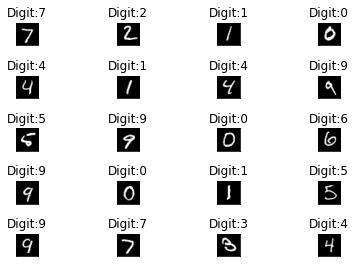

In [25]:
# Plot some examples with model predictions.
print('\nSome correct classification:')
plot_example_right(X_test, y_test, y_pred)


Some incorrect classification:


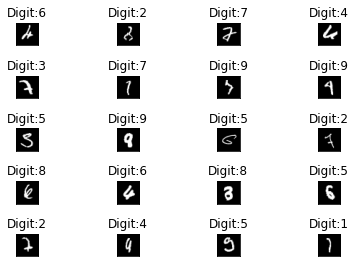

In [26]:
print('\nSome incorrect classification:')
plot_example_errors(X_test, y_test, y_pred)


Plot of training error over 20 epochs:


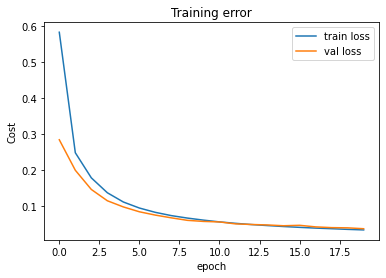

In [27]:
# Plot training error.
print('\nPlot of training error over 20 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()

_We can conclude that:_

* _The test set error (accuracy) is greater than 0.95% (0.98%)._
* _It seems to start converging after 10-12 epochs._

### ___Modified Activation Function = 'relu' and Optimizer = 'adam'___

In [34]:
# Defining Modified LeNet Model

def LeNet_5_Modified():
    model = Sequential()

    # C1: (None,32,32,1) -> (None,28,28,6).
    model.add(Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='relu', input_shape=(32,32,1), padding='valid'))

    # P1: (None,28,28,6) -> (None,14,14,6).
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # C2: (None,14,14,6) -> (None,10,10,16).
    model.add(Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='relu', padding='valid'))

    # P2: (None,10,10,16) -> (None,5,5,16).
    model.add(AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

    # Flatten: (None,5,5,16) -> (None, 400).
    model.add(Flatten())

    # FC1: (None, 400) -> (None,120).
    model.add(Dense(120, activation='relu'))

    # FC2: (None,120) -> (None,84).
    model.add(Dense(84, activation='relu'))

    # FC3: (None,84) -> (None,10).
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy']) 
    
    return model

In [35]:
model = LeNet_5_Modified()
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=20)

# Save the model.
model.save("/content/lenet5_model_modeified.h5")

Epoch 1/20
1875/1875 [==============================] - 42s 23ms/step - loss: 0.2040 - accuracy: 0.9394 - val_loss: 0.1080 - val_accuracy: 0.9642
Epoch 2/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0698 - accuracy: 0.9778 - val_loss: 0.0687 - val_accuracy: 0.9781
Epoch 3/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0511 - accuracy: 0.9841 - val_loss: 0.0524 - val_accuracy: 0.9832
Epoch 4/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0391 - accuracy: 0.9877 - val_loss: 0.0440 - val_accuracy: 0.9856
Epoch 5/20
1875/1875 [==============================] - 41s 22ms/step - loss: 0.0336 - accuracy: 0.9896 - val_loss: 0.0346 - val_accuracy: 0.9881
Epoch 6/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0268 - accuracy: 0.9914 - val_loss: 0.0390 - val_accuracy: 0.9880
Epoch 7/20
1875/1875 [==============================] - 42s 22ms/step - loss: 0.0235 - accuracy: 0.9922 - val_loss: 0.0332 -

In [40]:
# Restore the model.
model = keras.models.load_model('/content/lenet5_model_modeified.h5')

# Make prediction.
predictions = model.predict(X_test)

# Retrieve predictions indexes.
y_pred = np.argmax(predictions, axis=1)

# Print test set accuracy.
print('Test set error rate: {}'.format(np.mean(y_pred == y_test)))

Test set error rate: 0.9892



Some correct classification:


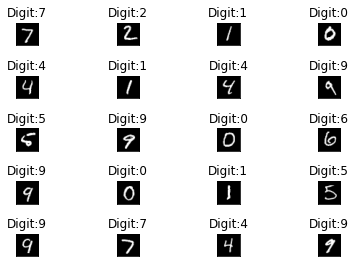

In [41]:
# Plot some examples with model predictions.
print('\nSome correct classification:')
plot_example_right(X_test, y_test, y_pred)


Some incorrect classification:


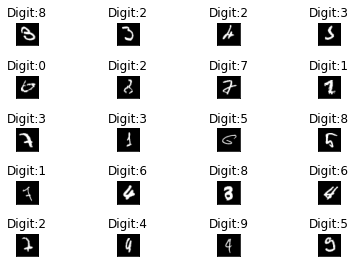

In [42]:
print('\nSome incorrect classification:')
plot_example_errors(X_test, y_test, y_pred)


Plot of training error over 20 epochs:


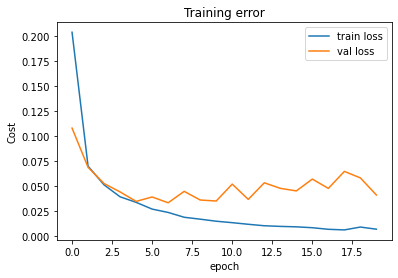

In [43]:
# Plot training error.
print('\nPlot of training error over 20 epochs:')
plt.title('Training error')
plt.ylabel('Cost')
plt.xlabel('epoch')

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train loss', 'val loss'], loc='upper right')
plt.show()